### Matplotlib

In [1]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
import numpy as np
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


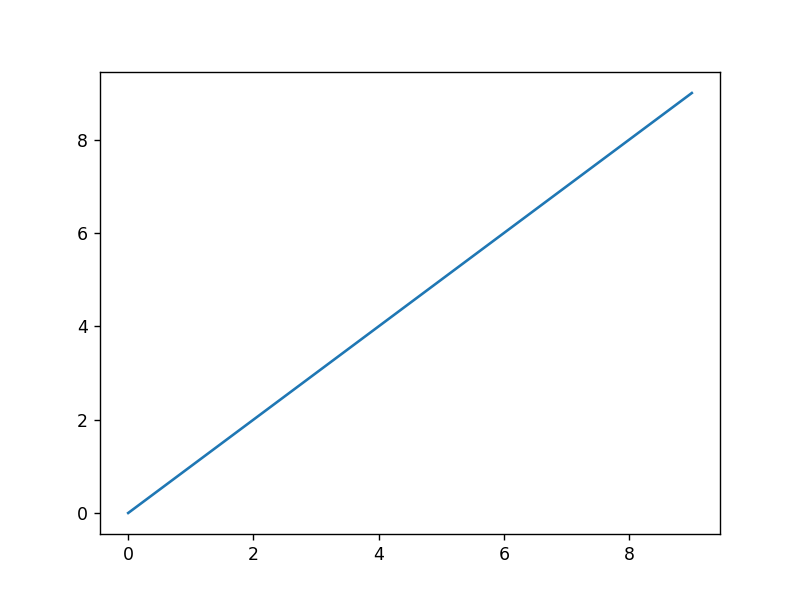

In [4]:
plt.plot(data)

#### 图片与子图

<IPython.core.display.Javascript object>


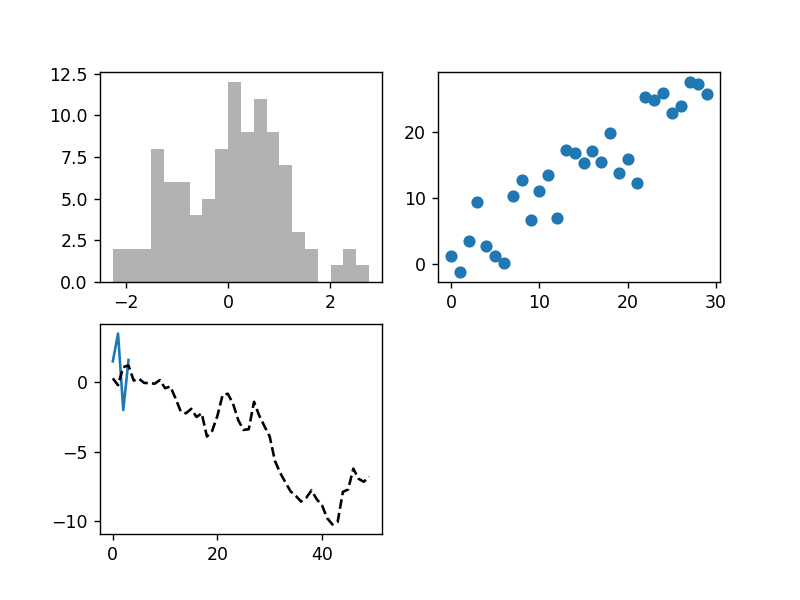

In [5]:
fig = plt.figure()

In [6]:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
# 太奇妙了，由于使用了 %matplotlib notebook，创建figure时就会显示空白图
# 运行上面三行添加三幅子图，也会实时刷新在上面

In [7]:
plt.plot([1.5, 3.5, -2, 1.6])  # 会在最后一个子图上绘制

In [8]:
plt.plot(np.random.randn(50).cumsum(), 'k--')  # k-- 黑色分段线

In [9]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

<IPython.core.display.Javascript object>


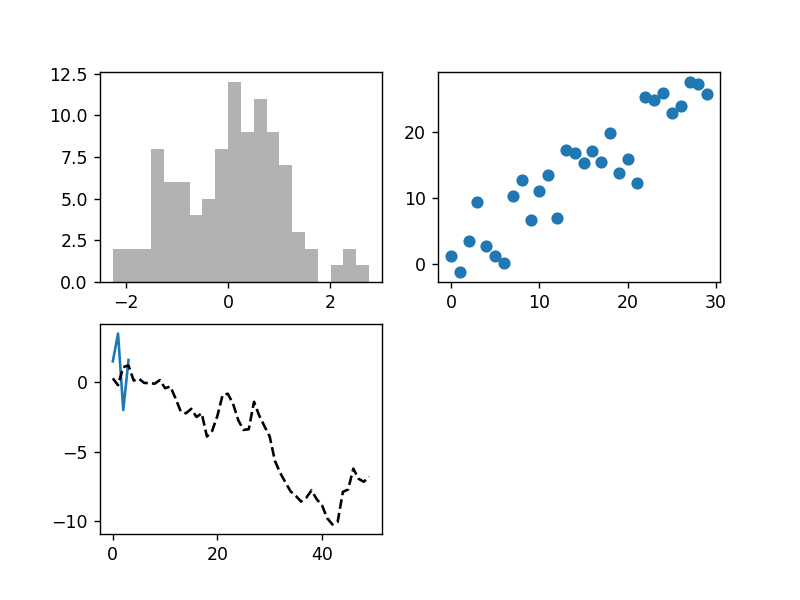

In [10]:
fig

In [11]:
ax2.scatter(np.arange(30), np.arange(30) + 3*np.random.randn(30))

<IPython.core.display.Javascript object>


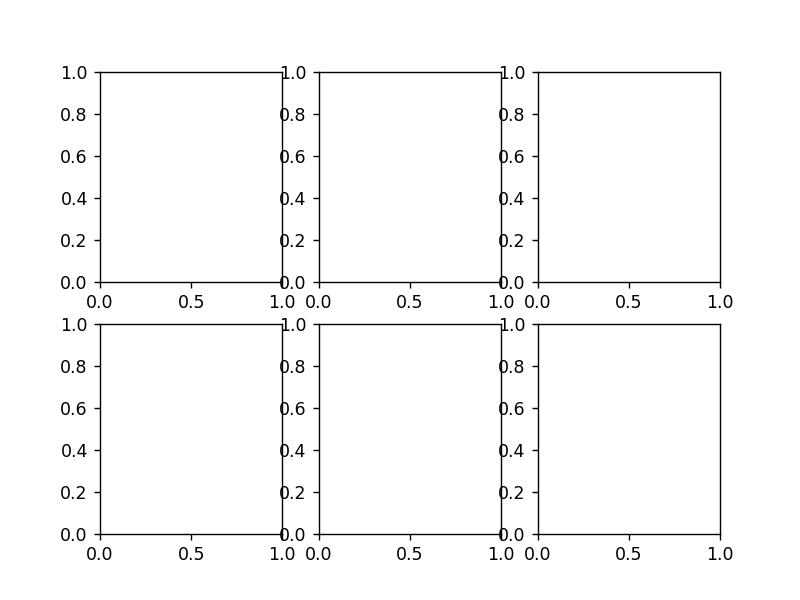

In [12]:
fig, axes = plt.subplots(2, 3)  # 创建一个图片，同时返回生成的子图对象的Numpy数组

In [13]:
axes

array([[<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

<IPython.core.display.Javascript object>


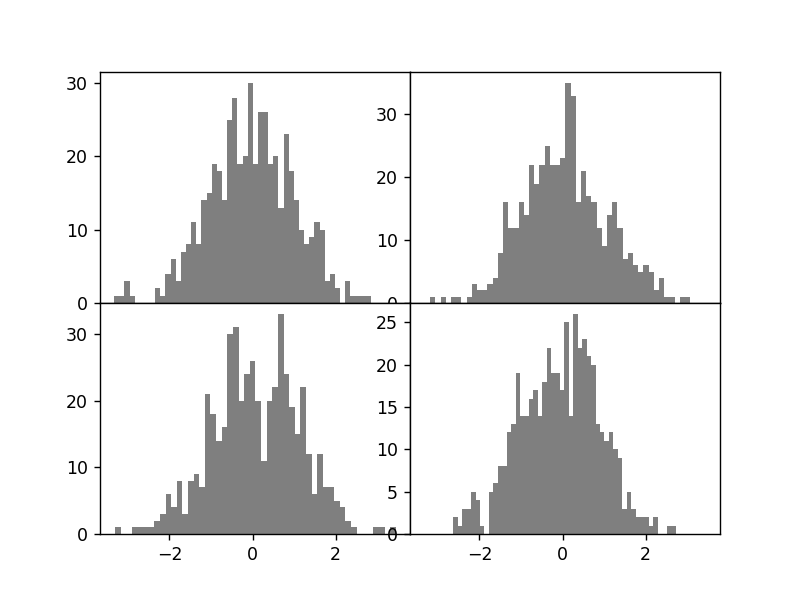

In [14]:
fig, axes = plt.subplots(2, 2, sharex=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)  # 调整间距，可观察到标签存在重叠，matplotlib不会自动检查标签重叠
# 需要通过显式指定刻度位置和刻度标签来修复标签的显示

#### 颜色、标记和线类型

In [18]:
plt.plot?  # 可以查看plot支持的颜色线型等信息

<IPython.core.display.Javascript object>


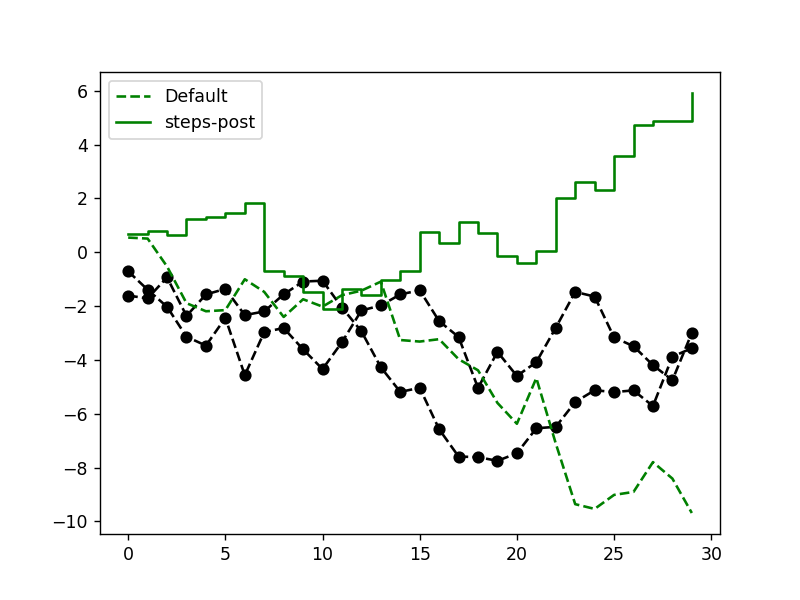

In [15]:
from numpy.random import randn
plt.figure()
plt.plot(randn(30).cumsum(), 'ko--')

In [16]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')  # 更显式指定线型和标记

In [17]:
# 指定中间插值点的方式
plt.plot(randn(30).cumsum(), 'g--', label='Default')
plt.plot(randn(30).cumsum(), 'g-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')  # 显式调用 legend 生成图例

#### 刻度、标签和图例

<IPython.core.display.Javascript object>


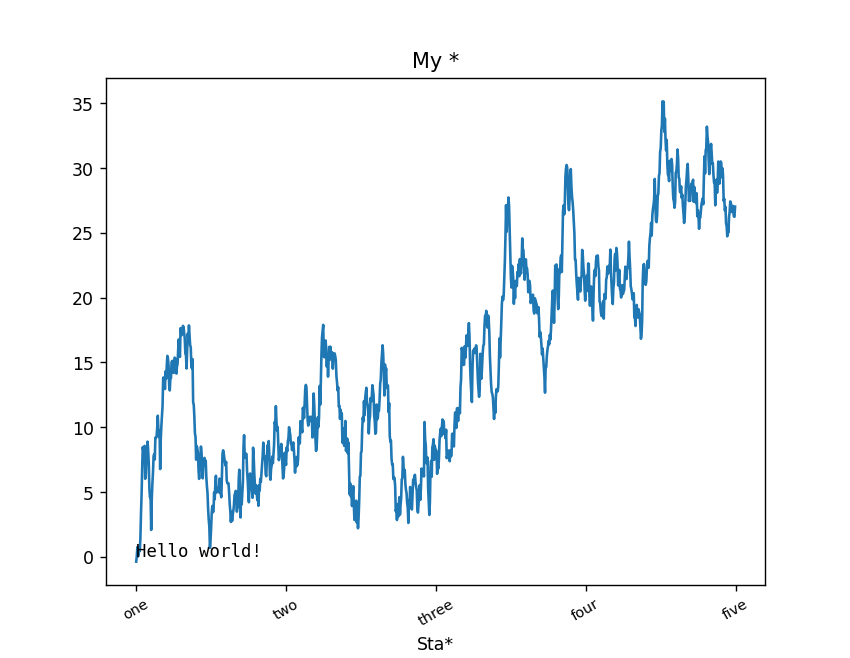

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [19]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [20]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

In [21]:
ax.set_title('My first matplotlib plot')

Text(0.5, 1.0, 'My first matplotlib plot')

In [22]:
ax.set_xlabel('Stages')

Text(0.5, 15.528422124795624, 'Stages')

In [23]:
# 批量设置绘图属性
props = {
    'title': 'My *',
    'xlabel': 'Sta*'
}
ax.set(**props)

[Text(0.5, 1.0, 'My *'), Text(0.5, 21.853422124795628, 'Sta*')]

In [24]:
ax.text(0, 0, 'Hello world!', family='monospace', fontsize=10)

Text(0, 0, 'Hello world!')

<IPython.core.display.Javascript object>


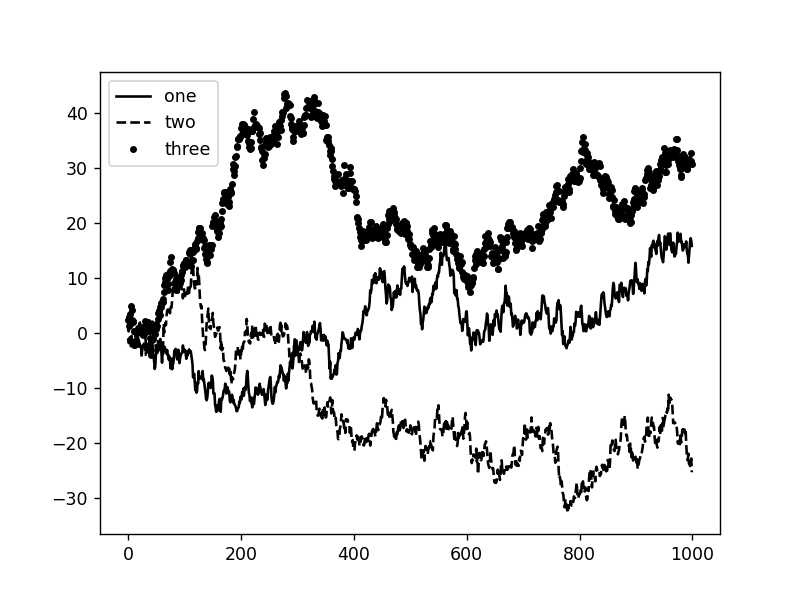

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

#### 注释与子图加工

<IPython.core.display.Javascript object>


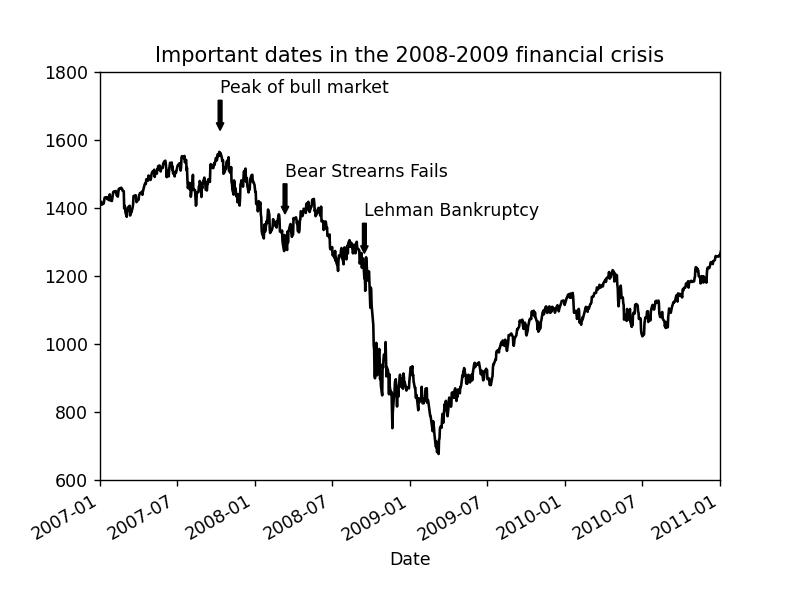

In [28]:
from datetime import datetime
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

In [30]:
import pandas as pd
data = pd.read_csv('pydata-book-2nd-edition/examples/spx.csv', index_col=0, parse_dates=True)
data

,SPX
Date,
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75
...,...
2011-10-10,1194.89
2011-10-11,1195.54
2011-10-12,1207.25


In [32]:
spx = data['SPX']
spx.plot(ax=ax, style='k-')

<AxesSubplot: xlabel='Date'>

In [34]:
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Strearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
                horizontalalignment='left', verticalalignment='top')
    
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

<IPython.core.display.Javascript object>


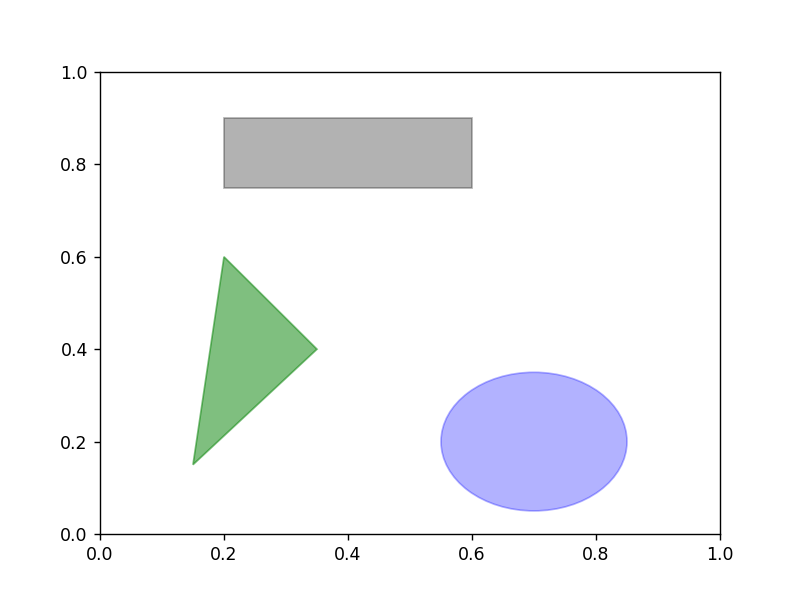

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)
ax.add_patch(rect)  # 将图形对象添加到子图中
ax.add_patch(circ)
ax.add_patch(pgon)

In [45]:
plt.savefig('figpath.pdf')  # 文件类型会根据扩展名推断

In [46]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [47]:
# 并不一定要写入硬盘，还能写到文件型对象中，例如BytesIO
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

In [63]:
plt.rcParams.update(plt.rcParamsDefault)  # 重置rc，%matplotlib notebook也会失效

In [52]:
# 使用rc方法修改配置
plt.rc('figure', figsize=(10, 10))  # 注意，前面绘制的图不受影响

In [54]:
font_options = {'family': 'monospace',
                'weight': 'bold',
                'size'  : 10}
plt.rc('font', **font_options)

In [55]:
# 使用.matplotlibrc文件定制设置

### 9.2 pandas 和 Seaborn 绘图

In [36]:
%matplotlib notebook

In [56]:
# seaborn 内部使用了matplotlib的设置系统，底层依赖matplotlib
# 导入 seaborn 会修改默认的 matplotlib 配色方案和绘图样式，所以即使不喜欢 seaborn 的API，也可以导入 seaborn 让 matplotlib 更美观

#### pandas绘图

<IPython.core.display.Javascript object>


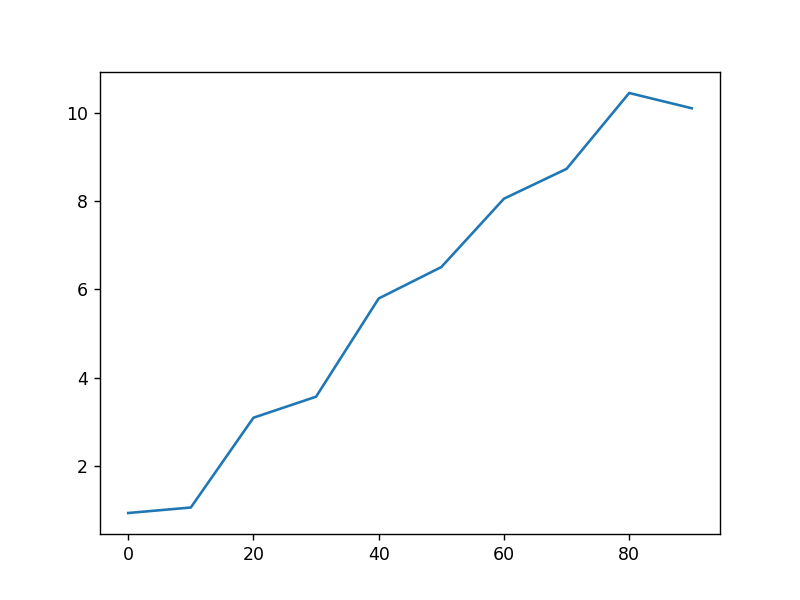

In [37]:
fig = plt.figure()

In [38]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s

0      0.934216
10     1.058566
20     3.090733
30     3.566853
40     5.790057
50     6.501323
60     8.048907
70     8.724421
80    10.441739
90    10.095874
dtype: float64

In [39]:
s.plot()

<AxesSubplot: >

<IPython.core.display.Javascript object>


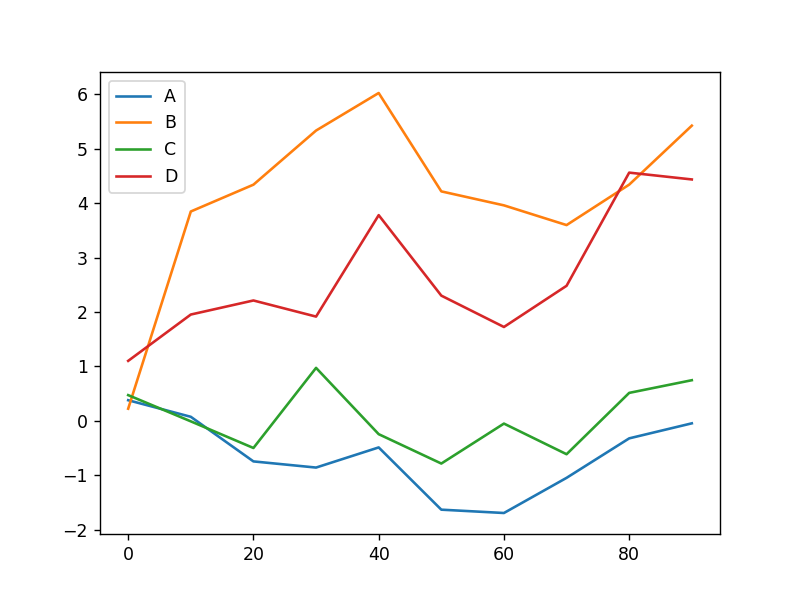

<AxesSubplot: >

In [40]:
#fig = plt.figure()  # 不需要一句，df.plot会自动生成新的画板
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0, 100, 10))
df.plot()  # 可以指定kind绘图类型，默认line，即等价于df.plot.line()

<IPython.core.display.Javascript object>


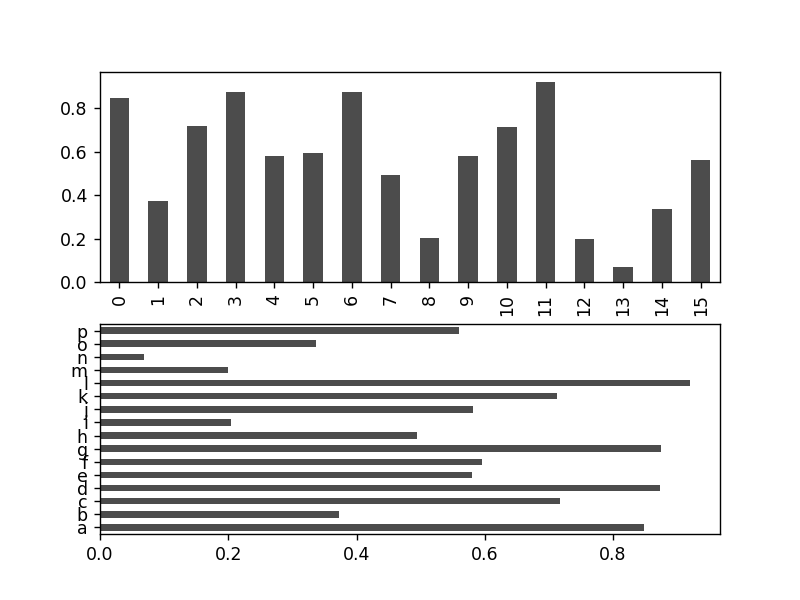

<AxesSubplot: >

In [41]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7, use_index=False)  # 不使用所有作为刻度标签
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [42]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.427114,0.976535,0.546080,0.590525
two,0.266095,0.325198,0.317437,0.012384
three,0.986106,0.627755,0.935821,0.320780
four,0.321547,0.536030,0.184103,0.768049
five,0.220611,0.874392,0.356293,0.996293
six,0.507532,0.809750,0.157840,0.052741


<IPython.core.display.Javascript object>


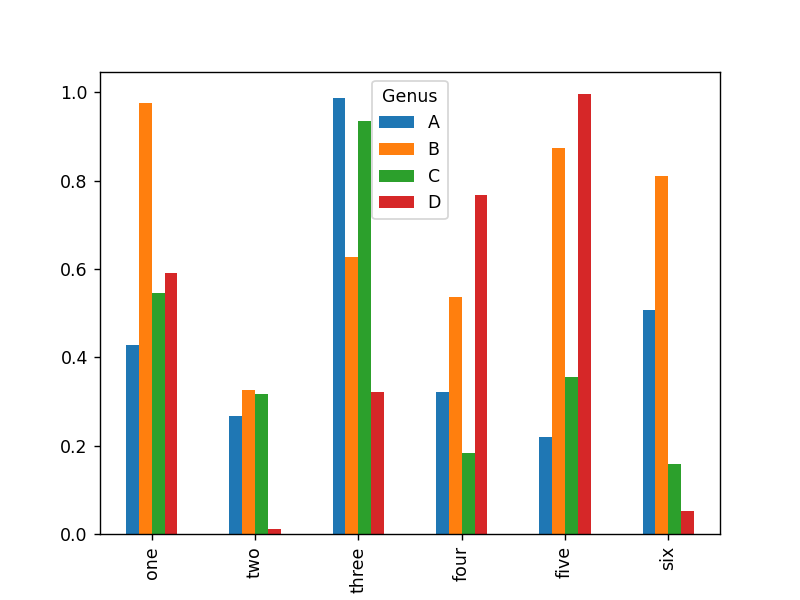

<AxesSubplot: >

In [43]:
df.plot.bar()

<IPython.core.display.Javascript object>


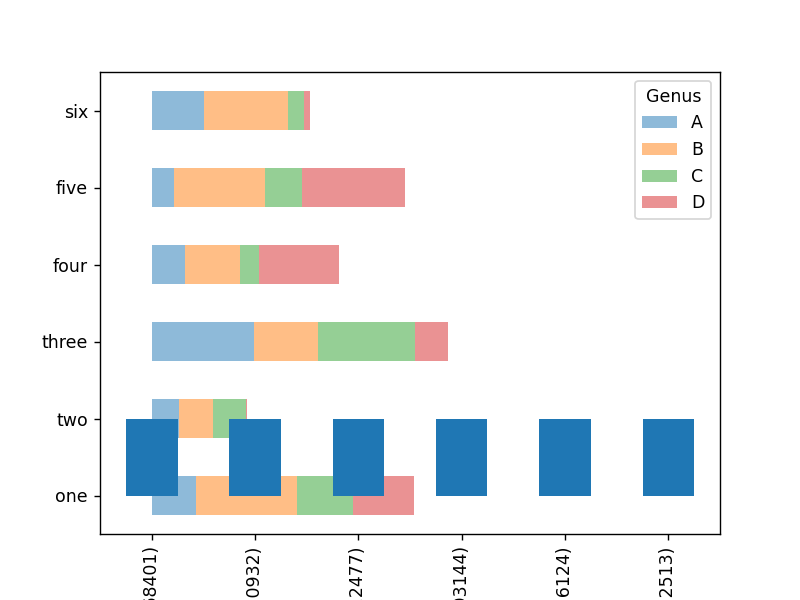

<AxesSubplot: >

In [44]:
df.plot.barh(stacked=True, alpha=0.5)

<IPython.core.display.Javascript object>


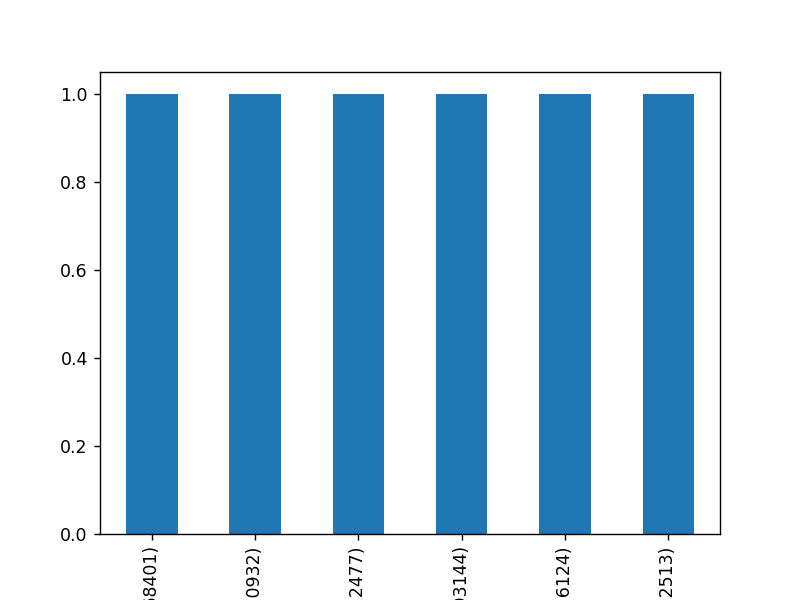

<IPython.core.display.Javascript object>


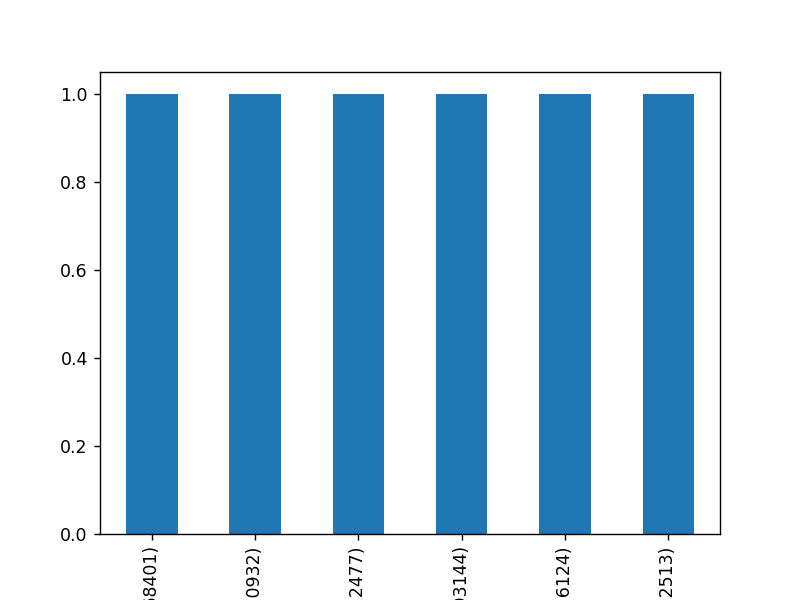

In [46]:
plt.figure()

In [47]:
df.value_counts().plot.bar()  # 这个不会生成新图片，可以在中间 .to_frame()

<AxesSubplot: xlabel='A,B,C,D'>

In [ ]:
tips = pd.read_csv('pydata-book-2nd-edition/examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])